## Exercise 5 - Regularized linear regression and Bias v. Variance

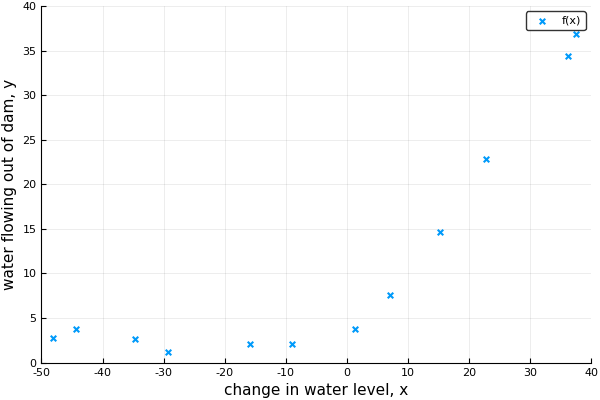

In [1]:
# Part 1: loading and visualizing data
using CSV, Plots; pyplot();
train = CSV.read("/Users/kevinliu/Google\ Drive/ML\ Coursera/week\ 6/ex5data1_csv/trainset_ex5data1.csv", datarow=1)
X = train[:, 1]; y = train[:, 2];

scatter(xaxis=("change in water level, x", (-50, 40), -50:10:40))
scatter!(yaxis=("water flowing out of dam, y", (0, 40), 0:5:40))
scatter!(X, y, markershape=:x, label="f(x)")

In [2]:
# Part 2: [vectorized] regularized linear regression cost
X = hcat(ones(12, 1), Vector(train[:, 1])); y = Vector(train[:, 2]);

function sigmoid(z)
    1.0 ./ (1.0 .+ exp.(-z))
end

function cost(θ, X, y, λ)
    hx = sigmoid(X * θ)
    m = length(y)
    θ_reg = [0, θ[2:end, :], ]
    global J = (1 / 2m) * sum((hx - y).^2) + (λ / 2m) * θ_reg * θ_reg'
    global grad = (1 / m) * (X' * (hx - y) + λ * θ_reg)
    println("Cost is $J")
    println("Gradient is $grad")
end

cost([1, 1], X, y, 1)

Cost is Any[131.295 [131.295]; [131.295] [131.337]]
Gradient is Any[-10.727, [-235.776]]
